# Criando algoritmo de inteligência artificial para predição se o passageiro sobreviveu ou não na base de dados do Titanic

In [177]:
# Importando base de dados e o pandas

import pandas as pd

base_treino = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/titanic_train.csv')

display(base_treino.head())

display(base_treino.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [178]:
# Iniciando tratamento dos dados
remover = ['Cabin', 'Name', 'Ticket']
base_treino = base_treino.drop(remover, axis=1).dropna(subset=['Age'], how='any')

# Desmembrando colunas de texto para obter dados numericos para treinamento do modelo
dummies_sex = pd.get_dummies(base_treino['Sex'], dtype=int)
dummies_embarked = pd.get_dummies(base_treino['Embarked'], dtype=int)
dummies = pd.concat([dummies_sex, dummies_embarked], axis=1)

base_treino = pd.concat([base_treino, dummies], axis=1).drop(['Sex', 'Embarked'], axis=1)

display(base_treino)
display(base_treino.info())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,1,0,0,1,0
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
 7   female       714 non-null    int64  
 8   male         714 non-null    int64  
 9   C            714 non-null    int64  
 10  Q            714 non-null    int64  
 11  S            714 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 72.5 KB


None

In [179]:
# Definindo X e Y para treinamento dos modelos
x_treino = base_treino.drop(['Survived', 'PassengerId'], axis=1)
y_treino = base_treino.Survived

In [180]:
# Iniciando escolha do modelo

# Treinando Arvore de decisão
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(x_treino, y_treino)

# Treinando KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(x_treino, y_treino)

# Treinando Regressor logístico
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=1000).fit(x_treino, y_treino)


In [181]:
# Importando base de testes

base_teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/titanic_test.csv')

display(base_teste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


None

In [182]:
# Tratando base de testes

remover = ['Cabin', 'Name', 'Ticket']
base_teste = base_teste.drop(remover, axis=1)

base_teste.loc[base_teste.Age.isnull(), 'Age'] = base_teste.Age.median()

# Desmembrando colunas de texto para obter dados numericos para treinamento do modelo
dummies_sex = pd.get_dummies(base_teste['Sex'], dtype=int)
dummies_embarked = pd.get_dummies(base_teste['Embarked'], dtype=int)
dummies = pd.concat([dummies_sex, dummies_embarked], axis=1)

base_teste = pd.concat([base_teste, dummies], axis=1).drop(['Sex', 'Embarked'], axis=1)
base_teste.loc[base_teste.Fare.isnull(), 'Fare'] = base_teste.Fare.median()

display(base_teste)
display(base_teste.info())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,1,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,27.0,0,0,8.0500,0,1,0,0,1
414,1306,1,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,0,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,0,3,27.0,0,0,8.0500,0,1,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   female       418 non-null    int64  
 8   male         418 non-null    int64  
 9   C            418 non-null    int64  
 10  Q            418 non-null    int64  
 11  S            418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB


None

In [183]:
# Definindo X e Y

x_teste = base_teste.drop(['Survived', 'PassengerId'], axis=1)
y_teste = base_teste.Survived

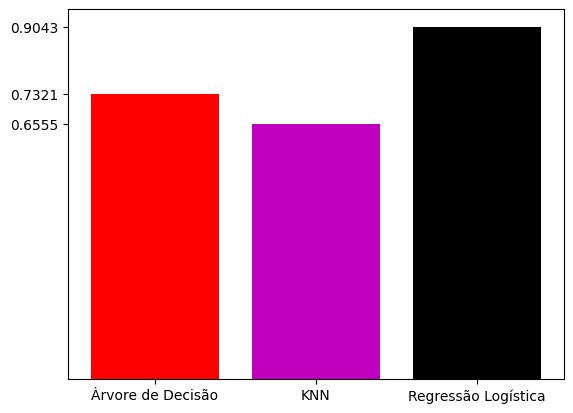

In [184]:
# Realizando as predições

pred_tree = tree.predict(x_teste)
pred_knn = knn.predict(x_teste)
pred_reg = reg.predict(x_teste)

# Medindo acurácia dos modelos

from sklearn.metrics import accuracy_score

acuracia_tree = accuracy_score(y_teste, pred_tree)
acuracia_knn = accuracy_score(y_teste, pred_knn)
acuracia_reg = accuracy_score(y_teste, pred_reg)

# Exibindo resultados

import matplotlib.pyplot as plt

modelos = ['Àrvore de Decisão', 'KNN', 'Regressão Logística']
resultados = [acuracia_tree, acuracia_knn, acuracia_reg]
plt.bar(modelos, resultados, color=['r', 'm', 'k'])
plt.yticks(resultados)
plt.show()

In [185]:
# Separando arquivo para envio do kaggle

base_teste['Survived'] = pred_reg

base_envio = base_teste[['PassengerId', 'Survived']]

base_envio.to_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/previsoes.csv', index=False)

base_envio

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
